
# Project: Investigate a Medical Appointment No-Show Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I am going to perform a data analysis on the Medical appointment dataset in which I will see the pattern of the patient who were present on the booked day of appointment and the patient who miss their appointments.

With such an amazing dataset some obvious question out of curiosity arises like,

1. <a href="#question1">Does the patient who receive SMS show-up more as comparied to those doesn't receive any SMS?</a>
2. <a href="#question2">Does the difference between the scheduled date and the actual date of appointment affect the patients show up?</a>
3. <a href="#question3">Which Age Group is more likely to show up on the day of appointment?</a>
4. <a href="#question4">For which condition the patient show-up is the highest?</a>
5. <a href="#question5">Does the patient who got scholarship have less presence or more as compaired to those who didn't get scholarship?</a>
6. <a href="#question6">What is the percentage of show-up on the appointment day according to the day of the week?</a>

### IMPORTING LIBRARIES

In [1]:
# Importing important libraries which are reqired in this project
%matplotlib inline  
# Magic keyword to plot the graph 

import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Reading the csv file into a pandas datafram 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv',parse_dates = ['ScheduledDay','AppointmentDay'])
df.head() # Top view of the data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Since __ScheduledDay__ and __AppointmentDay__ are date and time values so we read them as date object using *parse_dates* parameter of read_csv function.

<a id='memory'></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


#### Data Details:  
- There are 110,527 rows(or observation) and 14 columns(or variables) in the dataframe.  
- There are no null observation for any variable.  

Variables:
- AppointmentID : An identification of every appoinment.
- PatientId : An identification of patient.
- Gender : Gender of patient which can be either 'M' for male and 'F' for female.
- ScheduledDay : Day on which the appointment with the doctor was booked.
- AppointmentDay : The day of actual appointment.
- Age : Age of the patient.
- Neighourhood : The palce where the appointment is going to take place.
- Scholarship : Whether the family of the patient takes part in the Bolsa Familia Program, an initiative that provides families with small cash transfers in exchange for keeping children in school and completing health care visits.
- Hipertension : Whether the patient have hipertension or not.
- Diabetes : Whether the patient have diabetes or not.
- Alcoholism : Whether the patient is addicted to alcohol or not.
- Handcap : Whether the patient is handicap or not.
- SMS_received : Whether the patient received any message as a reminder for the appointment.
- No-show : If the patient showed up on the day of appoinment then it is 'No' otherwise 'Yes'.



### Data Cleaning (Converting variables into proper data types!)

**1)** First we will check if there are any null observations or not in dataframe.

In [4]:
# The combination of isnull and any function on the dataframe check whether there is any value 
# in any observation if there is any null value then this expression will return a True value 
# Else false. If value of any row comes to be true then it will get printed using the square brackets.

df[df.isnull().any(axis=1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> As we can see that zero rows are printed in the ouput which means there is no null value in the dataframe.  

**2)** The _No-show_ variable is very confusing to understand as 'No' is when the patients show up and 'Yes' when he/she didn't show up. So wil create a new variable _Show_ from the _No-show_ variable which is 1 when the patient shows up and 0 when he/she didn't show up.

In [5]:
print(df['No-show'].value_counts()) # Check if No-show contain any value other than 'No' and 'Yes'

df['Show'] = np.where(df['No-show'].str.contains('No'),1,0) # Creating new variable using the 'No-show' variable 

print(df[['Show','No-show']].head(10)) # Print the head of Show and No-Show variable 

df2 = df.drop('No-show',axis=1) # Deleting the No-show variable as it is not required anymore.
# After droping the column we saved the dataframe into new variable so that we can access our original data whenever required.

No     88208
Yes    22319
Name: No-show, dtype: int64
   Show No-show
0     1      No
1     1      No
2     1      No
3     1      No
4     1      No
5     1      No
6     0     Yes
7     0     Yes
8     1      No
9     1      No


> After creating the new varible 'Show' we dropped the old column 'No-show'.

**3)** As we will need to compare our data on the basis of day of the week of appointment so we will make a new column *AppointmentDayOfWeek*.

In [6]:
# Extracting the day of week using dt method on date time object
df2['ScheduledDayOfWeek'] = df2.ScheduledDay.dt.weekday_name
print(df2.ScheduledDayOfWeek.value_counts())

df2['AppointmentDayOfWeek'] = df2.AppointmentDay.dt.weekday_name
print(df2.AppointmentDayOfWeek.value_counts())

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: ScheduledDayOfWeek, dtype: int64
Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: AppointmentDayOfWeek, dtype: int64


> Most of the appointment were made during weekdays and very few during weekends.

**4)** The **SchelduledDay** variable contains both the date and the time of the appointment whereas the **AppointmentDay** variable contains only the date of the actual appointment. Therefore we will make both of these variable comparable by elminating the time from the **SchelduledDay** variable.

In [7]:
print(df2[['ScheduledDay','AppointmentDay']].head()) # Before 

df2.ScheduledDay =  pd.to_datetime(df2.ScheduledDay.dt.date) # Extracting only the date value from the date-time vaiable.

df2[['ScheduledDay','AppointmentDay']].head() # After

         ScheduledDay AppointmentDay
0 2016-04-29 18:38:08     2016-04-29
1 2016-04-29 16:08:27     2016-04-29
2 2016-04-29 16:19:04     2016-04-29
3 2016-04-29 17:29:31     2016-04-29
4 2016-04-29 16:07:23     2016-04-29


,ScheduledDay,AppointmentDay
0,2016-04-29,2016-04-29
1,2016-04-29,2016-04-29
2,2016-04-29,2016-04-29
3,2016-04-29,2016-04-29
4,2016-04-29,2016-04-29


**5)** Since _ScheduledDay_ and _AppointmentDay_ both are now comparable so now we will check that _AppoinmentDay_ for each observation is always equal or ahead of _ScheduledDay_. 

In [8]:
# The index where the date of booking is greater than the acutal day of appointment
indexOfError = (df2[df2.ScheduledDay > df2.AppointmentDay]).index
(df2.iloc[indexOfError])

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,ScheduledDayOfWeek,AppointmentDayOfWeek
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,0,Tuesday,Monday
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,Wednesday,Tuesday
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,0,Thursday,Wednesday
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,Wednesday,Thursday
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,0,Wednesday,Tuesday


> From the output we can see that there are 5 appointment in which the date of booking the appointment is greater than the day of actual appointment.  
The common things in these five observations:
- None of the patient show-up.
- Except for two handicap patients, none of them have any diseases.
- None of them received any Scholarship.
- None of them received any SMS.
- All Appointment were made in the month of May.

From above observation we can say that either these entries are false entries or their may be some other reason.  
Let's check month wise appointment booked.


In [9]:
# Percentage of actual appointment made only in the month of May
print(df2.AppointmentDay.value_counts().loc['2016-05'].sum()/len(df2)*100)

# Percentage of appointment booked only in the month of the May
print(df2.ScheduledDay.value_counts().loc['2016-05'].sum()/len(df2)*100)

73.1414043627349
60.999574764537165


> As we can see that 61% of apppointment booked and 73% of acutal appointment were made in the month of May only and due to that much of heavy booking wrong entries entered in the data. 

To solve this problem we will just make the day of scheduled equal to that of Appointment day.

In [10]:
df2.loc[indexOfError,'ScheduledDay'] = df2.loc[indexOfError,'AppointmentDay']
df2.loc[indexOfError,'ScheduledDayOfWeek'] = df2.loc[indexOfError,'AppointmentDayOfWeek']
df2.loc[indexOfError]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,ScheduledDayOfWeek,AppointmentDayOfWeek
27033,7.839273e+12,5679978,M,2016-05-09,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,0,Monday,Monday
55226,7.896294e+12,5715660,F,2016-05-17,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,Tuesday,Tuesday
64175,2.425226e+13,5664962,F,2016-05-04,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,0,Wednesday,Wednesday
71533,9.982316e+14,5686628,F,2016-05-05,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,Thursday,Thursday
72362,3.787482e+12,5655637,M,2016-05-03,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,0,Tuesday,Tuesday


**6)** Now let's check the *Age* column:

In [11]:
# Checking the upper and lower ages of the patients
print(df2.Age.value_counts().sort_index().head())
print(df2.Age.value_counts().sort_index().tail())

-1       1
 0    3539
 1    2273
 2    1618
 3    1513
Name: Age, dtype: int64
98     6
99     1
100    4
102    2
115    5
Name: Age, dtype: int64


> The upper ages seems to be fine but the lower ages doesn't seems to be correct.
The participant with the age of 0 are the new born babies.
There is one participant with the age of -1, which is not correct.

Let's check it out.

In [12]:
# Finding the patient id of the patient whose age is -1
# So that we can check at other observation the age of the patient.

id = df2[df2.Age == -1]['PatientId'].values[0]
df2[df2.PatientId == id]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,ScheduledDayOfWeek,AppointmentDayOfWeek
99832,4.659432e+14,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,1,Monday,Monday


> With this patientId there is only one row so now comes the plan B.

> The Patient with age -1 could be an unborn baby, so we will make his/her age 0. 

In [13]:
# Setting the age -1 to 0
df2.loc[df2.Age == -1,'Age'] = 0

# Check 
(df2.Age < 0).sum()

0

**7)** Now we will check whether all the categorical variable have desired values only.

In [14]:
# Checking whether all AppointmentId's are unique or not
df2.AppointmentID.nunique() == len(df2)

True

In [15]:
# Checking whether Gender variable have value other than 'M' and 'F'
df2.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [16]:
# Checking whether Scholarship column have value other than 0 or 1. 
df2.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [17]:
# Checking Whether Hipertension column have value other than 0 or 1.
df2.Hipertension.value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [18]:
# Checking whether Diabetes column have value other than 0 or 1.
df2.Diabetes.value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [19]:
# Checking whether Alcoholism column have value other than 0 or 1.
df2.Alcoholism.value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [20]:
# Checking whether Handicap column have value other than 0 or 1.
df2.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

> Handcap column have value other than 0 or 1 which are 2,3 and 4. But we need only 0( or False) and 1(or True). So we will convert 2, 3 and 4 into 1 as they can be representing the severity of a handicap person.

In [21]:
df2.loc[df2.Handcap != 0,'Handcap'] = 1
df2.Handcap.value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

In [22]:
# Checking whether SMS_received
df2.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

**8)** As some of the variable have only two kind of values either 1 or 0 and they are of type int64 which takes lot of space. So we will convert these variables into categorical data type.

In [23]:
# Function to convert a series into categorical data type.
def convert_to_categorical(series):
    return series.astype('category')

# Using apply function we will convert the required variables into categorical data types.
df2.loc[:,'Scholarship':'AppointmentDayOfWeek'] = df2.loc[:,'Scholarship':'AppointmentDayOfWeek'].apply(convert_to_categorical)


In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
PatientId               110527 non-null float64
AppointmentID           110527 non-null int64
Gender                  110527 non-null object
ScheduledDay            110527 non-null datetime64[ns]
AppointmentDay          110527 non-null datetime64[ns]
Age                     110527 non-null int64
Neighbourhood           110527 non-null object
Scholarship             110527 non-null category
Hipertension            110527 non-null category
Diabetes                110527 non-null category
Alcoholism              110527 non-null category
Handcap                 110527 non-null category
SMS_received            110527 non-null category
Show                    110527 non-null category
ScheduledDayOfWeek      110527 non-null category
AppointmentDayOfWeek    110527 non-null category
dtypes: category(9), datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 6.9+ MB


> We can see that by using the categorical datatype the memory usage decreases to 6.9 Mb from <a href="#memory">11.8 Mb</a>.

**9)** Creating different Age Group from age column for better analysis based on age.

In [25]:
# Creating a new column AgeGroup from the Age column
df2['AgeGroup'] = pd.cut(df.Age,bins = [-1,14,25,60,150],labels = ['Child','Youth','Adult','SeniorCitizen'])

# Aggregating the age to know minimum and maximum age of the AgeGroup column
df2.groupby(['AgeGroup']).Age.agg([min,max])

,min,max
AgeGroup,,
Adult,26,60
Child,0,14
SeniorCitizen,61,115
Youth,15,25


> Child : Age 0 to 14  
Youth : Age 15 to 25  
Adult : Age 26 to 60  
SeniorCitizen : more than 60

<a id='eda'></a>
## Exploratory Data Analysis

<a id='question1'></a>
### Research Question 1 : Does the patient who receive SMS show-up more as comparied to those doesn't receive any SMS?

In [26]:
# Converting Show up  column to numerical so that it is easy to calculate stats.
df2.Show = df2.Show.astype('int')

# Grouping the data bty SMS_received column
group = df2.groupby('SMS_received').Show

# Finding the Show-up mean of the patient who receives the SMS and who doesn't.
group.mean()

SMS_received
0    0.832967
1    0.724255
Name: Show, dtype: float64

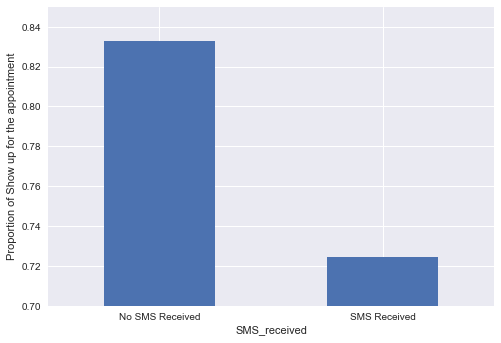

In [27]:

group.mean().plot.bar()                        # Plotting the bar plot 
plt.ylim((0.70,0.85))                          # Limiting the y axis
plt.xticks(range(2),("No SMS Received",'SMS Received'),rotation = 0) # Renaming the xticks
plt.ylabel('Proportion of Show up for the appointment')  # Y axis labelling


> As we can see that the 83% patient Shows-up on the day of appoinment who doesn't receives SMS and 72% Patient Shows-up on the day of appointment who does receive a SMS about the reminder of the appointment.  
It means that the patient who doesn't receives the SMS are 11% more likely to shows-up on the day of appointment, which is a completely reverse case.  
It mean that if the patient stop receiving SMS then the percentage of show-up may go up.

<a id='question2'></a>
### Research Question 2 : Does the difference between the scheduled date and the actual date of appointment affect the patients show up?

In [28]:
# Creating a new column which will hold the difference between the Appointment date 
# and the Scheduled date in terms of days.
df2['DaysDifference'] = (df2.AppointmentDay - df2.ScheduledDay)

# Extracting the numerical value of number of days from the timedelta data type by first
# converting the column into string and then applying the split function using apply on each observation
# then converting back into an integer datatype
df2['DaysDifference'] = df2.DaysDifference.astype(str).apply(lambda x:x.split(' ')[0]).astype(int)

df2.head() # First five observations of DaysDifference column after wrangling

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,ScheduledDayOfWeek,AppointmentDayOfWeek,AgeGroup,DaysDifference
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,Friday,SeniorCitizen,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,Friday,Adult,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,Friday,SeniorCitizen,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,Friday,Child,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,Friday,Adult,0


#### Exploring the question graphically:

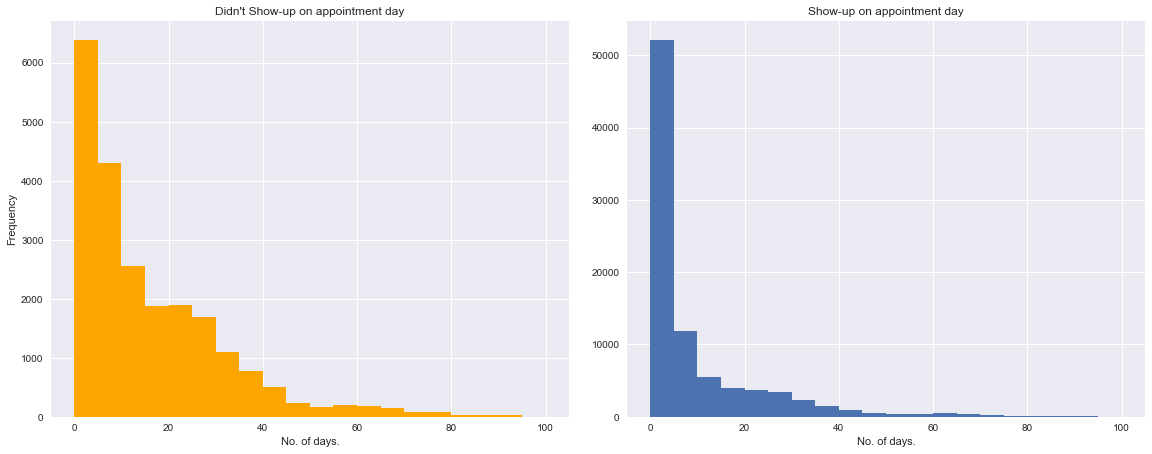

In [29]:
# Setting the position and size of the graph using plt.axes
plt.axes((0.05,0.05,0.9,1))

# Plotting the 
df2.loc[df2.Show==0,'DaysDifference'].hist(range=(0,100),bins=20,color = 'orange')
plt.xlabel("No. of days.")
plt.ylabel('Frequency')
plt.title("Didn't Show-up on appointment day")
plt.axes((1.05,0.05,0.9,1))
plt.xlabel("No. of days.")
plt.title("Show-up on appointment day")
df2.loc[df2.Show==1,'DaysDifference'].hist(range=(0,100),bins=20)


> From the histogram it is clear that the patient who book the appointment within just next 5 days are more likely to show up on the day of appointment

#### Exploring the question mathematically:

In [30]:
# We will use for loop to see the difference between days
for i in range(0,10):

    print('Percentage Show up when day Difference is <= {} is {}'.format(i,df2.loc[df2.DaysDifference <= i,'Show'].mean()))
    print('Percentage Show up when day Difference is > {} is {}\n'.format(i,df2.loc[df2.DaysDifference > i,'Show'].mean()))

Percentage Show up when day Difference is <= 0 is 0.9534069695084008
Percentage Show up when day Difference is > 0 is 0.714809822259898

Percentage Show up when day Difference is <= 1 is 0.9335328110367511
Percentage Show up when day Difference is > 1 is 0.7092110388637521

Percentage Show up when day Difference is <= 2 is 0.9106640795153051
Percentage Show up when day Difference is > 2 is 0.7033205044900951

Percentage Show up when day Difference is <= 3 is 0.9031609789080255
Percentage Show up when day Difference is > 3 is 0.7003875427693597

Percentage Show up when day Difference is <= 4 is 0.8908820665265748
Percentage Show up when day Difference is > 4 is 0.6935800284648229

Percentage Show up when day Difference is <= 5 is 0.882559456398641
Percentage Show up when day Difference is > 5 is 0.690867664265041

Percentage Show up when day Difference is <= 6 is 0.8745576867586982
Percentage Show up when day Difference is > 6 is 0.6853401969561325

Percentage Show up when day Differenc

> From the above output it is clear that the minimum the days of difference between Scheduled day and Actual appointment day the more the chances the patient will show up on the day of Appointment.

<a id="question3"></a>
### Research Question 3 : Which Age Group is more likely to show up on the day of appointment?

In [31]:
# Grouping the data by ageGroup  and then calulating the mean of Show column
ageGroupMeanShow =  df2.groupby('AgeGroup').Show.mean()*100
ageGroupMeanShow

AgeGroup
Adult            79.881146
Child            78.819280
SeniorCitizen    84.788989
Youth            74.631730
Name: Show, dtype: float64

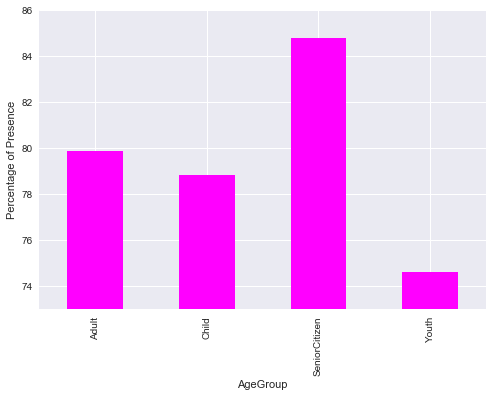

In [32]:
# Bar plot 
ageGroupMeanShow.plot.bar(color = 'magenta')
plt.ylim((73,86))
plt.ylabel('Percentage of Presence')

> From the graph we can say that Senior Citizen (Age > 60) are more likely to show-up for the booked Appoinment and Youth (Age 15 to 25) are least likely to show-up for the booked appointment.

<a id='question4'></a>
### Research Question 4: For which condition the patient show-up is the highest? 

In [33]:
# Function to find percentage persence on the appointment according to the condition for which patient want to visit
def mean_of_the_series(condition):
    return df2.loc[condition == 1,'Show'].mean()*100

# Finding the mean persence of all 4 condition using apply and mean_of_the_series function
Condition_Series = df2.loc[:,'Hipertension':'Handcap'].apply(mean_of_the_series)
Condition_Series

Hipertension    82.698041
Diabetes        81.996727
Alcoholism      79.851190
Handcap         81.838465
dtype: float64

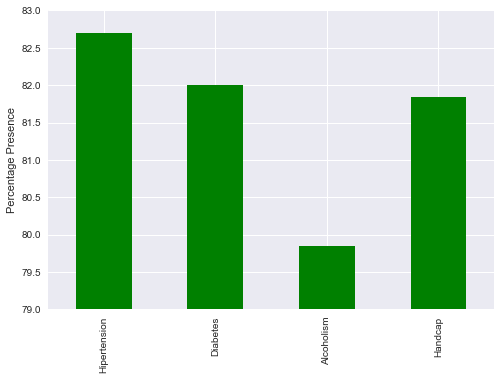

In [34]:
# Bar plot of all 4 condition mean presence percentage
Condition_Series.plot.bar(color = 'green')
plt.ylim((79,83))
plt.ylabel('Percentage Presence')


> From the above bar graph we can say that the patient suffering from Alcoholism are least likely to Show-up on the day of appoointment while the Hypertension Patient are most likely to show up on the day of Appointment.  

<a id='question5'></a>
### Research Question 5: Does the patient who got scholarship have less presence or more as compaired to those who didn't get scholarship?

In [35]:
# Calculating the percentage of show-up according to scholarship
scholarship_show = df2.groupby('Scholarship').Show.mean()*100
scholarship_show

Scholarship
0    80.192844
1    76.263696
Name: Show, dtype: float64

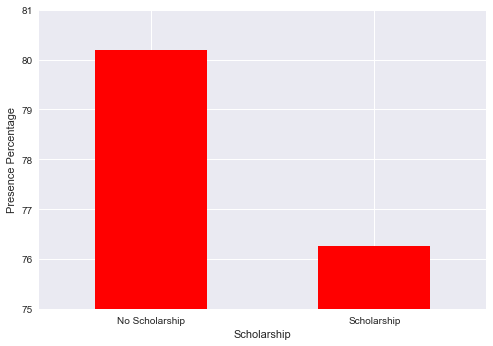

In [36]:
scholarship_show.plot.bar(color = 'red')                           # Bar plot of scholarship_show
plt.ylim((75,81))                                                  # Limiting the y axis
plt.xticks(range(2),("No Scholarship",'Scholarship'),rotation = 0) # Renaming the xticks
plt.ylabel('Presence Percentage')                                  # Y axis labelling


> The patient who were getting scholarship from the government were more absent as compaired to those who didn't got any scholarship.  
It means that the patient who were getting scholarship took it for granted.

<a id='question6'></a>
### Research Question 6: What is the percentage of show-up on the appointment day according to the day of the week?

In [37]:
# Creating a stat table of dataframe grouped by Day of Week of Appointment then 
# aggregating the age and show by mean and count for AppointmentId.

weekdays = df2.groupby('AppointmentDayOfWeek')[['Age','Show',
                                                'AppointmentID']].agg({'Age':'mean','Show':'mean','AppointmentID':'count'})
weekdays

,Age,Show,AppointmentID
AppointmentDayOfWeek,,,
Friday,37.054735,0.787739,19019
Monday,36.825930,0.793529,22715
Saturday,53.589744,0.769231,39
Thursday,37.240216,0.806459,17247
Tuesday,37.259360,0.799064,25640
Wednesday,37.050141,0.803108,25867


> The number of Appointment on saturday is only 39 as compaired to weekdays which have appointment multiple of 10K and also the average age of patient on saturday is around 54 and during weekdays it is around 37.  
From this observation we can say that younger generation prefer weekdays for medical appointment.

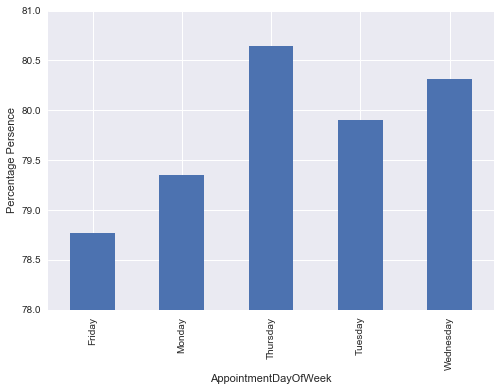

In [38]:
# First dropped the Saturday row from weekdays then multiplied mean of show with 100 
# and finally plotting the bar of remaining weekdays 
(weekdays.drop('Saturday',axis=0)['Show']*100).plot.bar()
plt.ylim((78,81))  # Limiting the y axis
plt.ylabel('Percentage Persence')


> From the above graph we can say that patients is more likely to miss their appointment if they booked on moday or friday.

<a id='conclusions'></a>
## Conclusions


<a href = "#question1">From Question 1</a>  
The patients who didn't received the SMS are more likely to be present on the day of actual appointment as compaired to those who received SMS. In real this should be reverse. But may be the content of the SMS is demotivating the people and they choose not to attend the appointment.
  
<a href = "#question2">From Question 2</a>  
The patient is more likely to be present on the day of actual appointment if the difference between the acutal appointment day and the appointment booking day in terms of days is as few as possible. The reason for this is that the people tend to forget when the the appointment day is far from the booking day.
  
<a href = "#question3">From Question 3</a>  
The patient is more likely to be present on the day of actual appointment if his/her age fall in the category of Senior Citizen and is less likely to be present if his/her age falls in the category of Youth. This may be due that senior citizen are more serious and reposible as compaired to the youth.  
  
<a href = "#question4">From Question 4</a>  
The patient suffering from alcoholism are less likely to be present on the day of appointment as compaired to hypertension patient, handicap patient and diabetes patient. The reason for this is that the patients addicted to alcohol are so addicted that they couldn't resist the urge of drinking alcohol even on the day of appointment and after that they are not in the state that they could reach the medical centre or even.  
  
<a href = "#question5">From Question 5</a>  
The patient who didn't got the scholarship are more likely to be present on the day of appointment as compaired to those who got the scholarship. This may be due to that people who got the scholarship take the appointed as granted and didn't care if they show-up or not on the actual day of appointment.  
  
<a href = "#question6">From Question 6</a>  
The patients who booked their appointment on the monday and friday are more likely to miss the appointment as compaired to the rest of the three middle days. This may be due to that monday and friday are at the ends of weekend days saturday and sunday and people don't like to go out and work on these days. So it may be a psycological reason.

### Limitations  
1). In all the categorical column (Hipertension, Handcap, SMS_received, Diabetes ,Alcoholism and Scholorship) we have taken the value 0  as a False value but it may be the case in some observation that 0 is represent the missing value and if that is the case than our analysis would completely change.  
  
2). Instead of just a date value in AppointmentDay column if there was also a time value then first we could have checked whether the date and time of ScheduledDay is equal or less than the AppointmentDay properly and also we could have analysed the show-up according to the time of the day whether the show-up is low or high during morning, afternoon, or evening.  
  
3). If the dataset had a detail about the state/region of the neighbourhood column then we could have analysed about the show up based on every state/region in Brazil. 

<a href="#intro">To the Top</a>

** It was lot of fun doing this project. I thoroughly enjoyed doing this.**

### THANK YOU 